In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


In [22]:
Neuron_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/AndrewMasterAdded.csv')
ASD_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/ASDMaster.csv')

print(Neuron_df)
print(ASD_df)

Neuron_df = Neuron_df.iloc[: , 1:]
print(Neuron_df)

ASD_df = ASD_df.iloc[: , 1:]
print(ASD_df)


# Master_DF = pd.concat([Neuron_df, ASD_df])
Master_DF = pd.read_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv')
print(Master_DF)

       Unnamed: 0     time  Taps  dura   dist      prob     speed  plate  \
0               0  600.000     1  2.58  0.323  0.650000  0.125194      1   
1               1  610.066     2  3.11  0.489  0.611111  0.157235      1   
2               2  620.098     3  1.82  0.210  0.350000  0.115385      1   
3               3  630.132     4  1.62  0.281  0.592593  0.173457      1   
4               4  640.167     5  1.29  0.227  0.851852  0.175969      1   
...           ...      ...   ...   ...    ...       ...       ...    ...   
91135         115  852.177    26  1.12  0.231  0.425926  0.206250      4   
91136         116  862.240    27  0.87  0.201  0.568627  0.231034      4   
91137         117  872.308    28  0.78  0.160  0.516667  0.205128      4   
91138         118  882.343    29  0.87  0.174  0.542373  0.200000      4   
91139         119  892.374    30  1.60  0.366  0.466667  0.228750      4   

        Gene Allele    Screen  
0      lip-1  AH102  Neuronal  
1      lip-1  AH102  Ne

In [ ]:
####### Save Master Data to CSV #######

Master_DF.to_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv', sep=",")

In [23]:
Initial_Neuron = Neuron_df[Neuron_df.Taps == 1]
Initial_ASD = ASD_df[ASD_df.Taps == 1]

Last3Taps = [28,29,30]
FinalTaps_Neuron = Neuron_df[Neuron_df.Taps.isin(Last3Taps)]
FinalTaps_ASD = ASD_df[ASD_df.Taps.isin(Last3Taps)]

print(Initial_Neuron)
print(Initial_ASD)
print(FinalTaps_Neuron)
print(FinalTaps_ASD)


          time  Taps  dura   dist      prob     speed  plate    Gene  Allele  \
0      600.000     1  2.58  0.323  0.650000  0.125194      1   lip-1   AH102   
30     600.029     1  1.93  0.279  0.781250  0.144560      2   lip-1   AH102   
60     600.030     1  3.05  0.398  0.600000  0.130492      3   lip-1   AH102   
90     600.025     1  2.68  0.431  0.818182  0.160821      4   lip-1   AH102   
120    600.012     1  2.80  0.667  0.930233  0.238214      1   nsy-1     AU3   
...        ...   ...   ...    ...       ...       ...    ...     ...     ...   
90990  600.008     1  2.30  0.431  0.966667  0.187391      4  inx-22  XM1011   
91020  600.024     1  2.92  0.815  0.979167  0.279110      1   abl-1     XR1   
91050  600.024     1  2.91  0.832  0.977778  0.285911      2   abl-1     XR1   
91080  600.021     1  3.09  0.945  0.941176  0.305825      3   abl-1     XR1   
91110  600.021     1  2.85  0.908  0.930233  0.318596      4   abl-1     XR1   

         Screen  
0      Neuronal  
30 

In [24]:
Neuron_strains = dict(zip(Initial_Neuron.Allele, Initial_Neuron.Gene))

ASD_strains = dict(zip(Initial_ASD.Allele, Initial_ASD.Gene))

print(Neuron_strains)
print(ASD_strains)

{'AH102': 'lip-1', 'AU3': 'nsy-1', 'AU98': 'inx-14', 'BA1': 'fer-1', 'BA1070': 'cdh-5', 'BA1084': 'F09C12.2', 'BA1090': 'cav-2', 'BA1091': 'C35D10.2', 'BA1093': 'snf-10', 'BA785': 'spe-8', 'BB2': 'adr-1', 'BC96': 'unc-22', 'BQ5': 'eak-6', 'BR2815': 'nep-1', 'BS3383': 'pmk-3', 'BZ873': 'dop-3', 'CB1124': 'che-3', 'CB1220': 'unc-82', 'CB1309': 'lin-2', 'CB1375': 'daf-18', 'CB1387': 'daf-10', 'CB1417': 'lin-3', 'CB1460': 'unc-89', 'CB1482': 'sma-6', 'CB152': 'unc-5', 'CB193': 'unc-29', 'CB2': 'vab-1', 'CB246': 'unc-64', 'CB251': 'unc-36', 'CB268': 'unc-41', 'CB271': 'unc-40', 'CB30': 'sma-1', 'CB3031': 'snb-1', 'CB312': 'unc-13', 'CB3241': 'cir-1', 'CB3687': 'che-14', 'CE1047': 'egl-30', 'CX20': 'adp-1', 'CX2065': 'odr-1', 'CX51': 'dyn-1', 'CX5463': 'slt-1', 'CX6161': 'inx-19', 'CX6391': 'syg-2', 'CZ1251': 'rpm-1', 'CZ1893': 'syd-1', 'CZ2485': 'ahr-1', 'CZ540': 'ptp-3', 'CZ900': 'syd-2', 'DA1084': 'egl-30', 'DA1814': 'ser-1', 'DA464': 'eat-5', 'DG1856': 'goa-1', 'DH1370': 'rme-6', 'DR47':

In [25]:
Neuron_Alleles = Neuron_df["Allele"].unique()
Neuron_Genes = Neuron_df["Gene"].unique()

ASD_Alleles = ASD_df["Allele"].unique()
ASD_Genes = ASD_df["Gene"].unique()

# print(Neuron_Alleles)
# print(Neuron_Genes)
print(ASD_Alleles)
print(ASD_Genes)

['ok1767' 'gk237614' 'tm2752' 'e120' 'gk705' 'tm522' 'n582' 'e55' 'gk366'
 'ad1650' 'ad698' 'e251' 'ok2694' 'e950' 'tm9711' 'ok2798' 'gk306'
 'ok3375' 'tm5775' 'ok869' 'ku258' 'ga80' 'mu63' 'qm39' 'ok3000' 'tm6473'
 'ok885' 'cx18' 'ok586' 'tm1072' 'ok711' 'e698' 'gk45' 'ie28' 'pk1389'
 'n4488' 'ok370' 'rh252' 'hd40' 'ok1323' 'gk747' 'gk793' 'gk189051'
 'tm3577' 'b1014' 'tm6649' 'tm4671' 'ok2349' 'n2461' 'ok2342' 'ok3324'
 'ok518' 'ok1339' 'tm3318' 'gk542081' 'tm7416' 'eg142' 'gk602291' 'js118'
 'js379' 'tm8384' 'tm846' 'ok2544' 'tm3104' 'tm3197' 'gk190875' 'tm8188'
 'gk149538' 'ok2754' 'tm238' 'ok533' 'ok646' 'N2' 'zu196' 'ok259' 'ds1'
 'ok1649' 'gk510' 'n4337' 'ok2172' 'gm57' 'ok3078' 'ok935' 'ok948'
 'tm2107' 'hc184' 'tm556' 'gk164' 'ok943' 'ok1573' 'ok3498' 'ok2695'
 'e1377' 'ok2106' 'ok2988' 'e1375' 'ok480' 'e102' 'md1117' 'ok469' 'n4909'
 'n4949' 'gk181' 'ok1241' 'tm1276' 'ok156' 'ok661' 'e109' 'n370' 'ok1608'
 'tm683' 'e234' 'e81' 'md299' 'ok1481' 'e1753' 'e1802' 'ok1001' 'tm748'

In [ ]:
Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])
# Neuron_Init_dura_Tstat_trial = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"]) 

ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])

# print(Initial_Neuron_Dura)

In [ ]:
def TTEST(List, Type, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        TSTAT=ttest_ind(DF_ref[DF_ref.Allele == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        row = [Screen, StrainsDict.get(a), a, TSTAT]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)


In [ ]:
# ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
# ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
# ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
# ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])



In [ ]:
TTEST(Neuron_Alleles, "dura", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dura_Tstat)
TTEST(Neuron_Alleles, "dist", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dist_Tstat)
TTEST(Neuron_Alleles, "prob", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_prob_Tstat)
TTEST(Neuron_Alleles, "speed", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_speed_Tstat)

In [ ]:
TTEST(ASD_Alleles, "dura", "ASD", ASD_strains, Initial_ASD, ASD_Init_dura_Tstat)
TTEST(ASD_Alleles, "dist", "ASD", ASD_strains, Initial_ASD, ASD_Init_dist_Tstat)
TTEST(ASD_Alleles, "prob", "ASD", ASD_strains, Initial_ASD, ASD_Init_prob_Tstat)
TTEST(ASD_Alleles, "speed", "ASD", ASD_strains, Initial_ASD, ASD_Init_speed_Tstat)

In [ ]:
Neuron_Init_TSTAT = pd.DataFrame()
Neuron_Init_TSTAT = Neuron_Init_dura_Tstat
Neuron_Init_TSTAT["dist_T"] = Neuron_Init_dist_Tstat["dist_T"]
Neuron_Init_TSTAT["prob_T"] = Neuron_Init_prob_Tstat["prob_T"]
Neuron_Init_TSTAT["speed_T"] = Neuron_Init_speed_Tstat["speed_T"]

print(Neuron_Init_TSTAT)

In [ ]:
ASD_Init_TSTAT = pd.DataFrame()
ASD_Init_TSTAT = ASD_Init_dura_Tstat
ASD_Init_TSTAT["dist_T"] = ASD_Init_dist_Tstat["dist_T"]
ASD_Init_TSTAT["prob_T"] = ASD_Init_prob_Tstat["prob_T"]
ASD_Init_TSTAT["speed_T"] = ASD_Init_speed_Tstat["speed_T"]
print(ASD_Init_TSTAT)

In [ ]:
#### T-Test ######

Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
# print(Neuron_Dura_Tstat)

for a in Neuron_Alleles:
    TSTAT=ttest_ind(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == a].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura,equal_var=False)[0]
    row = [Neuron_strains.get(a),a, TSTAT, "Neuronal"]
#     print(a,TSTAT)
    Neuron_Init_Dura_Tstat.loc[len(Neuron_Dura_Tstat)]=row

print(Neuron_Dura_Tstat)
    
    
    
# ttest(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "AH102"].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura)["T"]

In [ ]:
Init_Ttest_Master = pd.concat([Neuron_Init_TSTAT, ASD_Init_TSTAT])
print(Init_Ttest_Master)
Init_Ttest_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Init_Ttest_Master.csv', sep=",")

In [ ]:
FinalTaps_ASD.to_csv('/Users/Joseph/Desktop/ScreenData/ASD_FinalTaps.csv', sep=",")

In [ ]:
Initial_DF1 = Master_DF[Master_DF.Taps == 1]

Initial_DF = Initial_DF1.rename({"dura": "init_dura", 
                                 "dist": "init_dist", 
                                 "prob": "init_prob", 
                                 "speed": "init_speed"}, axis=1)
print(Initial_DF)
# Initial_DF.to_csv('/Users/Joseph/Desktop/ScreenData/FirstTaps.csv', sep=",")

In [ ]:
Last3Taps = [28,29,30]

FinalTaps_DF = Master_DF[Master_DF.Taps.isin(Last3Taps)]
print(FinalTaps_DF)

In [ ]:
### Calculate Mean of Final Habituated Level From 3 Taps

FinalLevels1 = FinalTaps_DF.groupby(["Gene", "Allele", "Screen", "plate"]).mean().reset_index()

FinalLevels = FinalLevels1.rename({"dura": "final_dura", 
                                   "dist": "final_dist", 
                                   "prob": "final_prob", 
                                   "speed": "final_speed"}, axis=1)

print(FinalLevels)
# FinalLevels.to_csv('/Users/Joseph/Desktop/ScreenData/FinalLevels.csv', sep=",")

In [ ]:
InitialAndFinal = pd.merge(Initial_DF,
                          FinalLevels,
                          on = ["Gene", "Allele", "plate","Screen"],
                          how = "inner")
print(InitialAndFinal)

In [ ]:
InitialAndFinal["hab_dura"]=InitialAndFinal["init_dura"]-InitialAndFinal["final_dura"]
InitialAndFinal["hab_dist"]=InitialAndFinal["init_dist"]-InitialAndFinal["final_dist"]
InitialAndFinal["hab_prob"]=InitialAndFinal["init_prob"]-InitialAndFinal["final_prob"]
InitialAndFinal["hab_speed"]=InitialAndFinal["init_speed"]-InitialAndFinal["final_speed"]
# InitialAndFinal.drop(['taps_x','taps_y','time_x', 'time_y'], axis=1, inplace=True)
print(InitialAndFinal)
# InitialAndFinal.to_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels.csv', sep=",")


InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

In [16]:
# Testing Manually Updated Dataframe (removed blank N2 row in speed)

InitialAndFinal = pd.read_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels_new.csv')

InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

      Unnamed: 0  init_dura  init_dist  init_prob  init_speed  plate   Gene  \
3037        3038       3.27      0.576   0.846154    0.176147      1  cnt-2   
3038        3039       3.13      0.526   0.785714    0.168051      2  cnt-2   
3039        3040       2.94      0.557   0.956522    0.189456      3  cnt-2   
3040        3041       1.48      0.316   0.888889    0.213514      4  cnt-2   
3041        3042       2.95      0.919   0.933333    0.311525      1  hcp-1   
...          ...        ...        ...        ...         ...    ...    ...   
3816        3817       2.30      0.526   0.782609    0.228696      1  bra-1   
3817        3818       2.59      0.574   0.700000    0.221622      2  bra-1   
3818        3819       2.21      0.504   0.837209    0.228054      3  bra-1   
3819        3820       2.57      0.555   0.911111    0.215953      4  bra-1   
3820        3821       1.96      0.396   0.853659    0.202041      5  bra-1   

        Allele Screen  final_dura  final_dist  fina

In [92]:
def TTEST_new_equalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=True)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=True)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=True)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=True)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=True)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=True)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=True)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=True)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=True)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=True)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=True)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)
    
def TTEST_new_noequalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=False)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=False)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=False)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=False)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=False)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=False)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=False)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=False)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=False)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=False)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=False)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)

In [93]:
Tstat_Master_ASD = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])
Tstat_Master_Neuron = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])

In [94]:
TTEST_new_noequalvar(ASD_Alleles, "ASD", ASD_strains, InitialAndFinal_ASD, Tstat_Master_ASD)
TTEST_new_noequalvar(Neuron_Alleles, "Neuronal", Neuron_strains, InitialAndFinal_Neuron, Tstat_Master_Neuron)

    Screen      Gene    Allele  T_init_dura  T_init_dist  T_init_prob  \
0      ASD     cnt-2    ok1767     0.530895    -2.195579     0.321809   
1      ASD     hcp-1  gk237614     1.894756     3.521201     0.158998   
2      ASD     aps-2    tm2752     2.588444     3.060893    -1.378205   
3      ASD     unc-4      e120   -13.858852   -15.996151   -17.778152   
4      ASD     unc-4     gk705    -5.614396   -17.096975   -13.918442   
..     ...       ...       ...          ...          ...          ...   
132    ASD   M03D4.4     tm559     3.362900     0.400464    -0.222107   
133    ASD  C25H3.11  gk425293     0.035118    -1.159943     0.643831   
134    ASD     ztf-6  gk122271     2.600547     1.926078    -0.407795   
135    ASD     ztf-6    tm1803     0.161963    -0.591348   -10.139843   
136    ASD     bra-1       nk1    -1.295531    -3.487395    -1.058306   

     T_init_speed  T_final_dura  T_final_dist  T_final_prob  T_final_speed  \
0       -6.182380      0.444320      0.244560

In [95]:
Tstat_Master = pd.concat([Tstat_Master_ASD,Tstat_Master_Neuron])
print(Tstat_Master)
# Tstat_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv', sep=",")

       Screen    Gene    Allele  T_init_dura  T_init_dist  T_init_prob  \
0         ASD   cnt-2    ok1767     0.530895    -2.195579     0.321809   
1         ASD   hcp-1  gk237614     1.894756     3.521201     0.158998   
2         ASD   aps-2    tm2752     2.588444     3.060893    -1.378205   
3         ASD   unc-4      e120   -13.858852   -15.996151   -17.778152   
4         ASD   unc-4     gk705    -5.614396   -17.096975   -13.918442   
..        ...     ...       ...          ...          ...          ...   
546  Neuronal   ncs-1     XA406    13.092311     1.124733     6.342023   
547  Neuronal   glc-3    XA7400     6.354883     2.207846     5.993588   
548  Neuronal      N2       XJ1    -9.634456   -10.296103    -0.890649   
549  Neuronal  inx-22    XM1011     2.800752    -3.780373     1.231875   
550  Neuronal   abl-1       XR1    11.923961     7.725933     3.414010   

     T_init_speed  T_final_dura  T_final_dist  T_final_prob  T_final_speed  \
0       -6.182380      0.444320  

In [4]:
Tstat_Master = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv')
Tstat_Master_copy = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master_copy.csv')
Tstat_Master_copy = Tstat_Master_copy.iloc[: , 1:]
print(Tstat_Master_copy)

           Screen    Gene    Allele  T_init_dura  T_init_dist  T_init_prob  \
0             ASD   cnt-2    ok1767     0.530895    -2.195579     0.321809   
1             ASD   hcp-1  gk237614     1.894756     3.521201     0.158998   
2             ASD   aps-2    tm2752     2.588444     3.060893    -1.378205   
3             ASD   unc-4      e120   -13.858852   -15.996151   -17.778152   
4             ASD   unc-4     gk705    -5.614396   -17.096975   -13.918442   
..            ...     ...       ...          ...          ...          ...   
683      Neuronal  inx-22    XM1011     2.793806    -3.809715     1.297769   
684      Neuronal   abl-1       XR1    11.912426     7.689003     3.492087   
685        ASD_N2      N2        N2     0.000000     0.000000     0.000000   
686   Neuronal_N2      N2        N2     0.000000     0.000000     0.000000   
687  Neuronal_XJ1      N2       XJ1    -9.674298   -10.362937    -0.693977   

     T_init_speed  T_final_dura  T_final_dist  T_final_prob  T_

In [98]:
import chart_studio.plotly as py
import chart_studio

## Connect with chartstudio
username = 'JosephLiangUBC' # Add your username
api_key = 'ZASGSzLhSTdvXdzCZplK' # Add your api key 

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [32]:
AxisNames = {
    "T_init_dura": "Initial Response Duration",
    "T_init_dist": "Initial Response Distance",
    "T_init_prob": "Initial Response Probability",
    "T_init_speed": "Initial Response Speed",
    "T_final_dura": "Final Response Duration",
    "T_final_dist": "Final Response Distance",
    "T_final_prob": "Final Response Probability",
    "T_final_speed": "Final Response Speed",
    "T_hab_dura": "Degree of Habituation of Response Duration",
    "T_hab_dist": "Degree of Habituation of Response Distance",
    "T_hab_prob": "Degree of Habituation of Response Probability",
    "T_hab_speed": "Degree of Habituation of Response Speed",
}


In [104]:
import plotly.express as px
df = Tstat_Master # iris is a pandas DataFrame
fig = px.scatter(df, 
                 x="T_hab_prob", 
                 y="T_init_prob", 
                 color="Screen", 
                 labels=AxisNames,
                 opacity=0.65,
                 color_discrete_sequence=["black", "red"],
                 hover_name="Gene", 
                 trendline = "ols",
                 marginal_x = "histogram",
                 marginal_y = "histogram",
                 hover_data=['Allele'])
fig.show()

In [105]:
py.plot(fig, filename = 'Initial_vs_Habituated_Probability', auto_open=True)

'https://plotly.com/~JosephLiangUBC/1/'

In [96]:
Corr_ASD = Tstat_Master_ASD.corr()
Corr_Neuron = Tstat_Master_Neuron.corr()
Corr_Master = Tstat_Master.corr()
print(Corr_ASD)
print(Corr_Neuron)

               T_init_dura  T_init_dist  T_init_prob  T_init_speed  \
T_init_dura       1.000000     0.925009     0.900220      0.053401   
T_init_dist       0.925009     1.000000     0.890216      0.568301   
T_init_prob       0.900220     0.890216     1.000000      0.185319   
T_init_speed      0.053401     0.568301     0.185319      1.000000   
T_final_dura      0.788551     0.798424     0.745880      0.086604   
T_final_dist      0.713062     0.825125     0.719713      0.398508   
T_final_prob      0.513711     0.572314     0.577666      0.111357   
T_final_speed     0.017172     0.365087     0.263823      0.743423   
T_hab_dura        0.966451     0.928372     0.879959      0.049215   
T_hab_dist        0.863615     0.961147     0.860725      0.475841   
T_hab_prob        0.574080     0.636979     0.729054      0.163407   
T_hab_speed       0.001595     0.369231     0.100508      0.573542   

               T_final_dura  T_final_dist  T_final_prob  T_final_speed  \
T_init_dura    

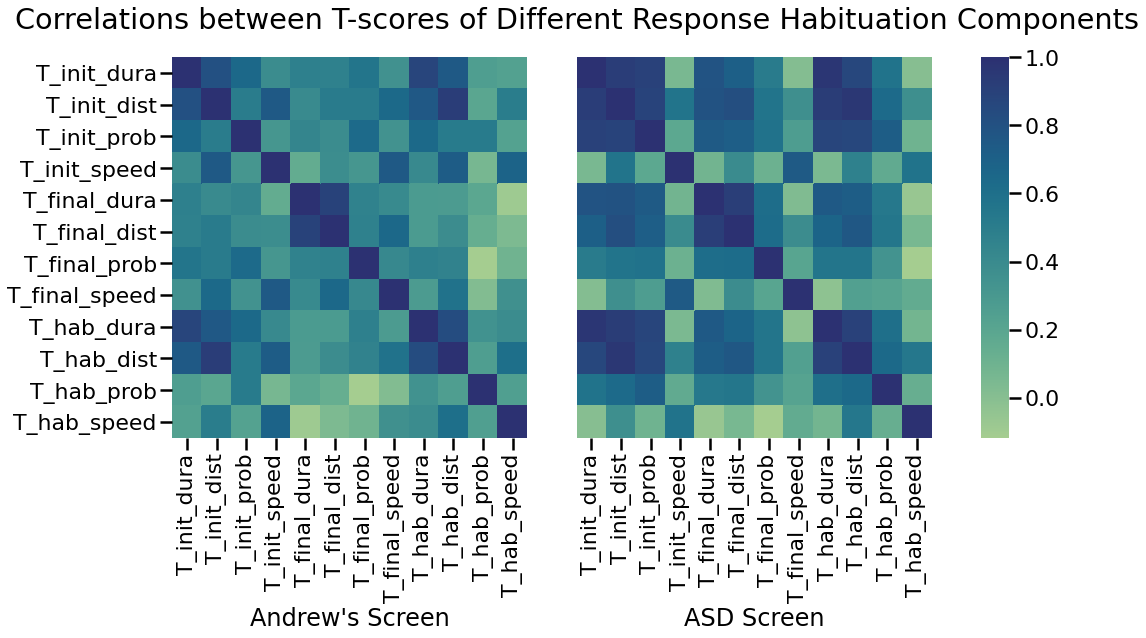

In [103]:
import seaborn as sns
sns.set_context("poster")
f,(ax1,ax2,axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]}, figsize = (15,7))
ax1.get_shared_y_axes().join(ax2)
f.suptitle('Correlations between T-scores of Different Response Habituation Components')
g1 = sns.heatmap(Corr_Neuron,cmap="crest",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel("Andrew's Screen")
g2 = sns.heatmap(Corr_ASD,cmap="crest",cbar_ax=axcb,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('ASD Screen')
g2.set_yticks([])


for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    
plt.savefig('/Users/Joseph/Desktop/ScreenData/CorrelationPlots_Welch.png', format='png', dpi=450, bbox_inches = 'tight')

In [47]:
fig = px.imshow(Corr_Master)
fig.show()

TypeError: imshow() got an unexpected keyword argument 'facet_col'

In [40]:
fig = px.imshow(Corr_ASD, labels=AxisNames)
fig.show()

In [39]:
fig = px.imshow(Corr_Neuron)
fig.show()

In [81]:
fig = px.imshow(Corr_Master)
fig.show()

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, Select


In [ ]:

select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
select.js_on_change("value", CustomJS(code="""
    console.log('select: value=' + this.value, this.toString())
"""))

show(select)